# 4. Training Classifier

**Naufal Hilmiaji**
**1301174314**

In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#Try different classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

D:\College\Anaconda\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Dataframe
path_df = "Data/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "Data/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "Data/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "Data/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "Data/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [3]:
print(features_train.shape)
print(features_test.shape)

(1891, 300)
(334, 300)


In [4]:
models = {1:'Logistic Regression',
          2:'Multinomial Naive Bayes', 
          3:'K Nearest Neighbour', 
          4:'Support Vector Machines', 
          5:'Random Forest'}

### Logistic Regression Classifier Cross-Validation for Hyperparameter Tuning

In [170]:
# Pilihan jenis classifier. Untuk selain nomor 1, maka perlu penyesuaian di bagian Random Search dan Grid Search.

choice = 1

if choice == 1:
    classifier = LogisticRegression(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==2:
    classifier = MultinomialNB()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    print(classifier)
elif choice==3:
    classifier =KNeighborsClassifier()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==4:
    classifier =svm.SVC(random_state=8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==5:
    classifier = RandomForestClassifier(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())

Parameters currently in use in Logistic Regression:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


### Randomized Search Cross Validation

Cari parameter yang secara random menggunakan cross validation.

In [171]:
if choice == 1:
    # Create the random grid logistic regression
    random_grid_log = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
               'class_weight': ['balanced', None],
               'penalty': ['l2']}
elif choice==2:
    pass
elif choice==3:
    pass
elif choice==4:
    # Create the random grid SVM
    random_grid_svm = {'C': [.0001, .001, .01],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': [.0001, .001, .01, .1, 1, 10, 100],
                  'degree': [1, 2, 3, 4, 5],
                  'probability': [True]
                 }
elif choice==5:
    # Create the random grid Random Forest
    random_grid_rfor = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [20, 40, 60, 80, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }
    
pprint(random_grid_log)

{'C': [0.1,
       0.3,
       0.5,
       0.7,
       0.8999999999999999,
       1.0999999999999999,
       1.3,
       1.5,
       1.7,
       1.9],
 'class_weight': ['balanced', None],
 'multi_class': ['multinomial'],
 'penalty': ['l2'],
 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}


In [173]:
# Definition of the random search
random_search_log = RandomizedSearchCV(estimator=classifier,
                                   param_distributions=random_grid_log,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search_log.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   18.8s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=8,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'C': [0.1, 0.3, 0.5, 0.7,
                                              0.8999999999999999,
                                              1.0999999999999999, 1.3, 1.5, 1.7,
                                              1.9],
          

In [394]:
print("The best hyperparameters from Random Search are:")
print(random_search_log.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search_log.best_score_)

The best hyperparameters from Random Search are:
{'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'class_weight': 'balanced', 'C': 1.9}

The mean accuracy of a model with these hyperparameters is:
0.9587519830777367


### Grid Search Cross Validation

Kemudian lanjutkan pencarian yang lebih detil terhadap daerah nilai terbaik hasil random search di atas.

In [395]:
# Create the parameter grid based on the results of random search 
param_grid_log = {'C': [float(x) for x in np.linspace(start = 0.6, stop = 1.5, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['sag'],
               'class_weight': ['balanced']}

# Create a base model
classifier = LogisticRegression(random_state=8)

In [396]:
param_grid_log

{'C': [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4, 1.5],
 'multi_class': ['multinomial'],
 'solver': ['sag'],
 'class_weight': ['balanced']}

In [177]:
# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets_log = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search_log = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid_log,
                           scoring='accuracy',
                           cv=cv_sets_log,
                           verbose=1)

# Fit the grid search to the data
grid_search_log.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    7.7s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=8, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002,
                               1.3, 1.4, 1.5],
                         'class_weight': ['balanced'],
                         'multi_class': ['multinomial'], 'solver': ['sag']},
 

In [397]:
print("The best hyperparameters from Grid Search are:")
print(grid_search_log.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search_log.best_score_)

The best hyperparameters from Grid Search are:
{'C': 1.4, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'sag'}

The mean accuracy of a model with these hyperparameters is:
0.9696


In [398]:
best_classifier_log = grid_search_log.best_estimator_

best_classifier_log

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

### Model fit and performance

In [399]:
best_classifier_log.fit(features_train, labels_train)

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [400]:
classifier_pred_log = best_classifier_log.predict(features_test)

In [404]:
d = {
     'Model': 'Logistic Regression',
     'Training Set Accuracy': accuracy_score(labels_train, best_classifier_log.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, classifier_pred_log)
}

df_models_log = pd.DataFrame(d, index=[0])
df_models_log

,Model,Training Set Accuracy,Test Set Accuracy
0,Logistic Regression,0.985722,0.94012


In [462]:
df_models_log.to_csv('Data/comparisons/model_fit_performance_log.csv')

In [405]:
# Classification report
print("Logistic Regression Classification Report\n")
print(classification_report(labels_test,classifier_pred_log))

Logistic Regression Classification Report

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        81
           1       0.90      0.96      0.93        49
           2       0.96      0.89      0.92        72
           3       0.99      0.99      0.99        72
           4       0.93      0.92      0.92        60

    accuracy                           0.94       334
   macro avg       0.94      0.94      0.94       334
weighted avg       0.94      0.94      0.94       334



### Confusion Matrix

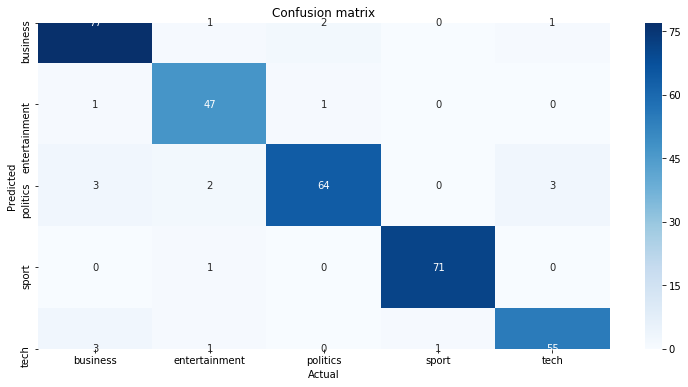

In [406]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_log)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Bandingkan performansi dengan base model, yaitu model dengan parameter default.

In [407]:
base_model_log = LogisticRegression(random_state = 8)
base_model_log.fit(features_train, labels_train)
accuracy_score(labels_test, base_model_log.predict(features_test))

D:\College\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\College\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9431137724550899

In [408]:
best_classifier_log.fit(features_train, labels_train)
accuracy_score(labels_test, best_classifier_log.predict(features_test))

0.9401197604790419

In [ ]:
accuracy_score(labels_test, best_classifier_log.predict(features_test))

In [403]:
accuracy_score(labels_train, best_classifier_log.predict(features_train))

0.9857218402961396

# Latihan

1. Ubah format penyimpanan data ke CSV
2. Coba buatkan feature berikut (save dan upload feature), lalu laporkan pengaruhnya terhadap akurasi klasifikasi:
    a. Tanpa proses normalisation
    b. Tanpa proses lemmatisation
    c. Tanpa menghilangkan stopwords
3. Coba buat tfidf dengan nilai "max_features" yang berbeda-beda (lebih besar dan lebih kecil dari 300), lalu laporkan pengaruhnya terhadap akurasi klasifikasi.
4. Coba dengan beberapa algoritma klasifikasi yang berbeda (minimal 2 algoritma), carilah parameter terbaik (jelaskan nilai2 parameter yang telah dicoba untuk tiap jenis algoritma).
5. Jika anda ingin menggunakan teks bahasa Indonesia, bagian mana saja yang perlu dilakukan penyesuaian?
6. Opsional: Gunakan word embedding (e.g word2vec, GloVe).

# Jawaban

Jawaban ditulis dalam sebuah laporan singkat format pdf

# 1. Mengubah format penyimpanan data ke CSV

In [22]:
import csv
import numpy as np


def convert1(path_pickle,path_csv):

    x = []
    with open(path_pickle,'rb') as f:
        x = pickle.load(f)

    x.to_csv(path_csv)

def convert2(path_pickle,path_csv):
    x = []
    with open(path_pickle,'rb') as f:
        x = pickle.load(f)
    
    with open(path_csv,'w') as f:
        writer = csv.writer(f)
        for line in x: writer.writerow(line)

def convert3(path_pickle,path_csv):
    x = []
    with open('Data/tfidf_300plus.pickle','rb') as f:
        x = pickle.load(f)

    contoh = pd.Series(x)

Untuk mengubah format data _.pickle_ menjadi _.csv_ saya menggunakan tiga fungsi yang berbeda, karena format file _.pickle_ yang berbeda dari beberapa file. Berikut ketentuan dari tiap-tiap fungsi:
* ```convert1``` digunakan untuk mengubah:
    * labels (train dan test)
    * X (train dan test)
    * Y (train dan test)
* ```convert2``` digunakan untuk mengubah:
    * features (train dan test)
    * df
* ```convert3``` digunakan untuk mengubah:
    * tfidf

### df

In [23]:
convert2('Data/df.pickle','Data/csv/df.csv')
convert2('Data/df_300min.pickle','Data/csv/df_300min.csv')
convert2('Data/df_300plus.pickle','Data/csv/df_300plus.csv')
convert2('Data/df_nonormal.pickle','Data/csv/df_nonormal.csv')
convert2('Data/df_nolemma.pickle','Data/csv/df_nolemma.csv')
convert2('Data/df_nostopwords.pickle','Data/csv/df_nostopwords.csv')

### features_test

In [24]:
convert2('Data/features_test.pickle','Data/csv/features_test.csv')
convert2('Data/features_test_300min.pickle','Data/csv/features_test_300min.csv')
convert2('Data/features_test_300plus.pickle','Data/csv/features_test_300plus.csv')
convert2('Data/features_test_nonormal.pickle','Data/csv/features_test_nonormal.csv')
convert2('Data/features_test_nolemma.pickle','Data/csv/features_test_nolemma.csv')
convert2('Data/features_test_nostopwords.pickle','Data/csv/features_test_nostopwords.csv')

### features_train

In [25]:
convert2('Data/features_train.pickle','Data/csv/features_train.csv')
convert2('Data/features_train_300min.pickle','Data/csv/features_train_300min.csv')
convert2('Data/features_train_300plus.pickle','Data/csv/features_train_300plus.csv')
convert2('Data/features_train_nonormal.pickle','Data/csv/features_train_nonormal.csv')
convert2('Data/features_train_nolemma.pickle','Data/csv/features_train_nolemma.csv')
convert2('Data/features_train_nostopwords.pickle','Data/csv/features_train_nostopwords.csv')

### labels_test

In [26]:
convert1('Data/labels_test.pickle','Data/csv/labels_test.csv')
convert1('Data/labels_test_300min.pickle','Data/csv/labels_test_300min.csv')
convert1('Data/labels_test_300plus.pickle','Data/csv/labels_test_300plus.csv')
convert1('Data/labels_test_nonormal.pickle','Data/csv/labels_test_nonormal.csv')
convert1('Data/labels_test_nolemma.pickle','Data/csv/labels_test_nolemma.csv')
convert1('Data/labels_test_nostopwords.pickle','Data/csv/labels_test_nostopwords.csv')

### labels_train

In [27]:
convert1('Data/labels_train.pickle','Data/csv/labels_train.csv')
convert1('Data/labels_train_300min.pickle','Data/csv/labels_train_300min.csv')
convert1('Data/labels_train_300plus.pickle','Data/csv/labels_train_300plus.csv')
convert1('Data/labels_train_nonormal.pickle','Data/csv/labels_train_nonormal.csv')
convert1('Data/labels_train_nolemma.pickle','Data/csv/labels_train_nolemma.csv')
convert1('Data/labels_train_nostopwords.pickle','Data/csv/labels_train_nostopwords.csv')

### tfidf

In [28]:
convert3('Data/tfidf.pickle','Data/csv/tfidf.csv')
convert3('Data/tfidf_300min.pickle','Data/csv/tfidf_300min.csv')
convert3('Data/tfidf_300plus.pickle','Data/csv/tfidf_300plus.csv')
convert3('Data/tfidf_nonormal.pickle','Data/csv/tfidf_nonormal.csv')
convert3('Data/tfidf_nolemma.pickle','Data/csv/tfidf_nolemma.csv')
convert3('Data/tfidf_nostopwords.pickle','Data/csv/tfidf_nostopwords.csv')

### X_test

In [29]:
convert1('Data/X_test.pickle','Data/csv/X_test.csv')
convert1('Data/X_test_300min.pickle','Data/csv/X_test_300min.csv')
convert1('Data/X_test_300plus.pickle','Data/csv/X_test_300plus.csv')
convert1('Data/X_test_nonormal.pickle','Data/csv/X_test_nonormal.csv')
convert1('Data/X_test_nolemma.pickle','Data/csv/X_test_nolemma.csv')
convert1('Data/X_test_nostopwords.pickle','Data/csv/X_test_nostopwords.csv')

### X_train

In [30]:
convert1('Data/X_train.pickle','Data/csv/X_train.csv')
convert1('Data/X_train_300min.pickle','Data/csv/X_train_300min.csv')
convert1('Data/X_train_300plus.pickle','Data/csv/X_train_300plus.csv')
convert1('Data/X_train_nonormal.pickle','Data/csv/X_train_nonormal.csv')
convert1('Data/X_train_nolemma.pickle','Data/csv/X_train_nolemma.csv')
convert1('Data/X_train_nostopwords.pickle','Data/csv/X_train_nostopwords.csv')

### Y_test

In [31]:
convert1('Data/y_test.pickle','Data/csv/y_test.csv')
convert1('Data/y_test_300min.pickle','Data/csv/y_test_300min.csv')
convert1('Data/y_test_300plus.pickle','Data/csv/y_test_300plus.csv')
convert1('Data/y_test_nonormal.pickle','Data/csv/y_test_nonormal.csv')
convert1('Data/y_test_nolemma.pickle','Data/csv/y_test_nolemma.csv')
convert1('Data/y_test_nostopwords.pickle','Data/csv/y_test_nostopwords.csv')

### Y_train

In [32]:
convert1('Data/y_train.pickle','Data/csv/y_train.csv')
convert1('Data/y_train_300min.pickle','Data/csv/y_train_300min.csv')
convert1('Data/y_train_300plus.pickle','Data/csv/y_train_300plus.csv')
convert1('Data/y_train_nonormal.pickle','Data/csv/y_train_nonormal.csv')
convert1('Data/y_train_nolemma.pickle','Data/csv/y_train_nolemma.csv')
convert1('Data/y_train_nostopwords.pickle','Data/csv/y_train_nostopwords.csv')

# Jawaban No. 2-4 berikut ini

## Membandingkan Algoritma Klasifikasi dengan _Default Dataset_

### _SVM Classifier_

In [410]:
# Pilihan jenis classifier. Untuk selain nomor 1, maka perlu penyesuaian di bagian Random Search dan Grid Search.

choice = 4

if choice == 1:
    classifier = LogisticRegression(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==2:
    classifier = MultinomialNB()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    print(classifier)
elif choice==3:
    classifier = KNeighborsClassifier()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==4:
    classifier = svm.SVC(random_state=8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==5:
    classifier = RandomForestClassifier(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())

Parameters currently in use in Support Vector Machines:

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


### SVM Cross-Validation for Hyperparameter Tuning

Cari parameter yang secara random menggunakan cross validation.

In [411]:
if choice == 1:
    # Create the random grid logistic regression
    random_grid_log = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
               'class_weight': ['balanced', None],
               'penalty': ['l2']}
elif choice==2:
    pass
elif choice==3:
    pass
elif choice==4:
    # Create the random grid SVM
    random_grid_svm = {'C': [.0001, .001, .01],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': [.0001, .001, .01, .1, 1, 10, 100],
                  'degree': [1, 2, 3, 4, 5],
                  'probability': [True]
                 }
elif choice==5:
    # Create the random grid Random Forest
    random_grid_rfor = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [20, 40, 60, 80, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }
    
pprint(random_grid_svm)

{'C': [0.0001, 0.001, 0.01],
 'degree': [1, 2, 3, 4, 5],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly'],
 'probability': [True]}


In [41]:
# Definition of the random search
random_search_svm = RandomizedSearchCV(estimator=classifier,
                                   param_distributions=random_grid_svm,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search_svm.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 28.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=8, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'C': [0.0001, 0.001, 0.01],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'probability': [True]},
                   pre_dispatch='2*n_jobs', random

In [412]:
print("The best hyperparameters from Random Search are:")
print(random_search_svm.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search_svm.best_score_)

The best hyperparameters from Random Search are:
{'probability': True, 'kernel': 'poly', 'gamma': 10, 'degree': 4, 'C': 0.01}

The mean accuracy of a model with these hyperparameters is:
0.9212057112638815


### Grid Search Cross Validation

Kemudian lanjutkan pencarian yang lebih detil terhadap daerah nilai terbaik hasil random search di atas.

In [141]:
# Create the parameter grid based on the results of random search 
C = [.0001, .001, .01, .1]
degree = [3, 4, 5]
gamma = [1, 10, 100]
probability = [True]

param_grid = [
  {'C': C, 'kernel':['linear'], 'probability':probability},
  {'C': C, 'kernel':['poly'], 'degree':degree, 'probability':probability},
  {'C': C, 'kernel':['rbf'], 'gamma':gamma, 'probability':probability}
]

# Create a base model
svc = svm.SVC(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
svm_grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
svm_grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\College\Anaconda\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\College\Anaconda\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\College\Anaconda\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

D:\College\Anaconda\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\College\Anaconda\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\College\Anaconda\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\College\Anaconda\Anaconda\lib\site-packages\sklearn\svm\base.py:

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=8, shrinking=True,
                           tol=0.001, verbose=False),
             iid='wa...one,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1], 'kernel': ['linear'],
                          'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1], 'degree': [3, 4, 5],
                          'kernel': ['poly'], 'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1],
                          'gamma': [1, 10, 100], 'kernel': ['rbf'],
                          'probability': [True]}],
             pre_

In [413]:
print("The best hyperparameters from Random Search are:")
print(svm_grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(svm_grid_search.best_score_)

The best hyperparameters from Random Search are:
{'C': 0.1, 'kernel': 'linear', 'probability': True}

The mean accuracy of a model with these hyperparameters is:
0.9498666666666666


In [414]:
best_classifier_svm = svm_grid_search.best_estimator_

best_classifier_svm

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=8,
    shrinking=True, tol=0.001, verbose=False)

### Model fit and performance

In [415]:
best_classifier_svm.fit(features_train, labels_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=8,
    shrinking=True, tol=0.001, verbose=False)

In [416]:
classifier_pred_svm = best_classifier_log.predict(features_test)

In [417]:
d = {
     'Model': 'SVM',
     'Training Set Accuracy': accuracy_score(labels_train, best_classifier_svm.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, classifier_pred_svm)
}

df_models_svm = pd.DataFrame(d, index=[0])
df_models_svm

,Model,Training Set Accuracy,Test Set Accuracy
0,SVM,0.959281,0.94012


In [461]:
df_models_svm.to_csv('Data/comparisons/model_fit_performance_svm.csv')

In [151]:
# Classification report
print("SVM Classification Report\n")
print(classification_report(labels_test,classifier_pred_svm))

SVM Classification Report

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        81
           1       0.90      0.96      0.93        49
           2       0.96      0.89      0.92        72
           3       0.99      0.99      0.99        72
           4       0.93      0.92      0.92        60

    accuracy                           0.94       334
   macro avg       0.94      0.94      0.94       334
weighted avg       0.94      0.94      0.94       334



### Confusion Matrix

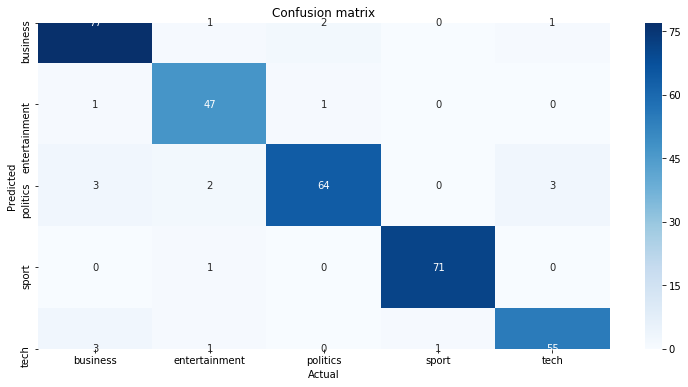

In [152]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_svm)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Bandingkan performansi dengan base model, yaitu model dengan parameter default.

In [208]:
base_model_svm = svm.SVC(random_state=8)
base_model_svm.fit(features_train, labels_train)
accuracy_score(labels_test, base_model_svm.predict(features_test))

D:\College\Anaconda\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.2155688622754491

In [209]:
best_classifier_svm.fit(features_train, labels_train)
accuracy_score(labels_test, best_classifier_svm.predict(features_test))

0.9401197604790419

### _KNN Classifier_

In [192]:
# Pilihan jenis classifier. Untuk selain nomor 1, maka perlu penyesuaian di bagian Random Search dan Grid Search.

choice = 3

if choice == 1:
    classifier = LogisticRegression(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==2:
    classifier = MultinomialNB()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    print(classifier)
elif choice==3:
    classifier = KNeighborsClassifier()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==4:
    classifier = svm.SVC(random_state=8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==5:
    classifier = RandomForestClassifier(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())

Parameters currently in use in K Nearest Neighbour:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


### KNN Cross-Validation for Hyperparameter Tuning

Cari parameter yang secara random menggunakan cross validation.

In [195]:
if choice == 1:
    # Create the random grid logistic regression
    random_grid_log = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
               'class_weight': ['balanced', None],
               'penalty': ['l2']}
elif choice==2:
    pass
elif choice==3:
    pass
elif choice==4:
    # Create the random grid SVM
    random_grid_svm = {'C': [.0001, .001, .01],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': [.0001, .001, .01, .1, 1, 10, 100],
                  'degree': [1, 2, 3, 4, 5],
                  'probability': [True]
                 }
elif choice==5:
    # Create the random grid Random Forest
    random_grid_rfor = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [20, 40, 60, 80, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }

#### In this case, since there is only one hyperparameter, we'll perform an exhaustive (grid) search directly:

### Grid Search Cross Validation

Kemudian lanjutkan pencarian yang lebih detil terhadap daerah nilai terbaik hasil random search di atas.

In [196]:
# Create the parameter grid 
param_grid_knn = {'n_neighbors': [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]}

In [197]:
# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

In [198]:
# Instantiate the grid search model
knn_grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid_knn,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
knn_grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.2min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                         51, 56, 61, 66, 71, 76, 81, 86, 91, 96,
                                         101, 106, 111, 116, 121, 127, 132, 137,
                                         142, 147, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [419]:
print("The best hyperparameters from Random Search are:")
print(knn_grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(knn_grid_search.best_score_)

The best hyperparameters from Random Search are:
{'n_neighbors': 6}

The mean accuracy of a model with these hyperparameters is:
0.9477333333333333


In [420]:
best_classifier_knn = knn_grid_search.best_estimator_

best_classifier_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

### Model fit and performance

In [421]:
best_classifier_knn.fit(features_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [422]:
classifier_pred_knn = best_classifier_log.predict(features_test)

In [423]:
d = {
     'Model': 'KNN',
     'Training Set Accuracy': accuracy_score(labels_train, best_classifier_knn.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, classifier_pred_knn)
}

df_models_knn = pd.DataFrame(d, index=[0])
df_models_knn

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN,0.95981,0.94012


In [460]:
df_models_knn.to_csv('Data/comparisons/model_fit_performance_knn.csv')

In [424]:
# Classification report
print("KNN Classification Report\n")
print(classification_report(labels_test,classifier_pred_knn))

KNN Classification Report

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        81
           1       0.90      0.96      0.93        49
           2       0.96      0.89      0.92        72
           3       0.99      0.99      0.99        72
           4       0.93      0.92      0.92        60

    accuracy                           0.94       334
   macro avg       0.94      0.94      0.94       334
weighted avg       0.94      0.94      0.94       334



### Confusion Matrix

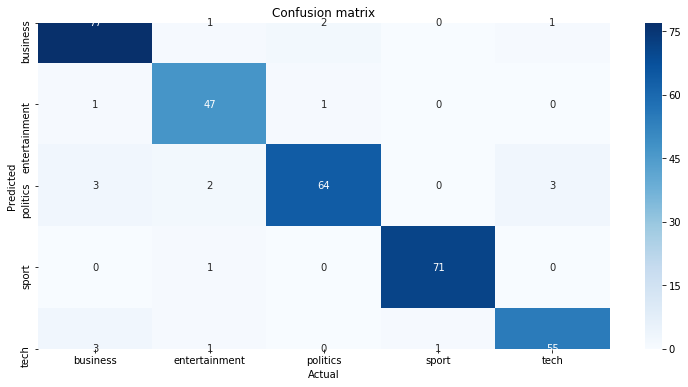

In [425]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_knn)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Bandingkan performansi dengan base model, yaitu model dengan parameter default.

In [213]:
base_model_knn = KNeighborsClassifier()
base_model_knn.fit(features_train, labels_train)
accuracy_score(labels_test, base_model_knn.predict(features_test))

0.9341317365269461

In [215]:
best_classifier_svm.fit(features_train, labels_train)
accuracy_score(labels_test, best_classifier_knn.predict(features_test))

0.9281437125748503

### _Multinomial Naive Bayes Classifier_

In [155]:
# Pilihan jenis classifier. Untuk selain nomor 1, maka perlu penyesuaian di bagian Random Search dan Grid Search.

choice = 2

if choice == 1:
    classifier = LogisticRegression(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==2:
    classifier = MultinomialNB()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    print(classifier)
elif choice==3:
    classifier =KNeighborsClassifier()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==4:
    classifier =svm.SVC(random_state=8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==5:
    classifier = RandomForestClassifier(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())

Parameters currently in use in Multinomial Naive Bayes:

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


### Randomized Search Cross Validation

Cari parameter yang secara random menggunakan cross validation.

In [156]:
if choice == 1:
    # Create the random grid logistic regression
    random_grid_log = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
               'class_weight': ['balanced', None],
               'penalty': ['l2']}
elif choice==2:
    pass
elif choice==3:
    pass
elif choice==4:
    # Create the random grid SVM
    random_grid_svm = {'C': [.0001, .001, .01],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': [.0001, .001, .01, .1, 1, 10, 100],
                  'degree': [1, 2, 3, 4, 5],
                  'probability': [True]
                 }
elif choice==5:
    # Create the random grid Random Forest
    random_grid_rfor = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [20, 40, 60, 80, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }
    
# pprint(random_grid_mulnb)

### Multinomial NB Cross-Validation for Hyperparameter Tuning

In the case of the Multinomial Naïve Bayes, we will not tune any hyperparameter.

In [157]:
classifier_mulnb = classifier
classifier_mulnb.fit(features_train, labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [158]:
mulnb_pred = classifier_mulnb.predict(features_test)

### Model fit and performance

In [216]:
d = {
     'Model': 'Multinomial NB',
     'Training Set Accuracy': accuracy_score(labels_train, classifier_mulnb.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mulnb_pred)
}

df_models_mul = pd.DataFrame(d, index=[0])
df_models_mul

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial NB,0.953993,0.934132


In [459]:
df_models_mul.to_csv('Data/comparisons/model_fit_performance_mulnb.csv')

In [217]:
# Classification report
print("Multinomial NB Classification Report\n")
print(classification_report(labels_test,mulnb_pred))

Multinomial NB Classification Report

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        81
           1       0.96      0.90      0.93        49
           2       0.97      0.90      0.94        72
           3       0.97      0.99      0.98        72
           4       0.87      0.90      0.89        60

    accuracy                           0.93       334
   macro avg       0.94      0.93      0.93       334
weighted avg       0.94      0.93      0.93       334



### Confusion Matrix

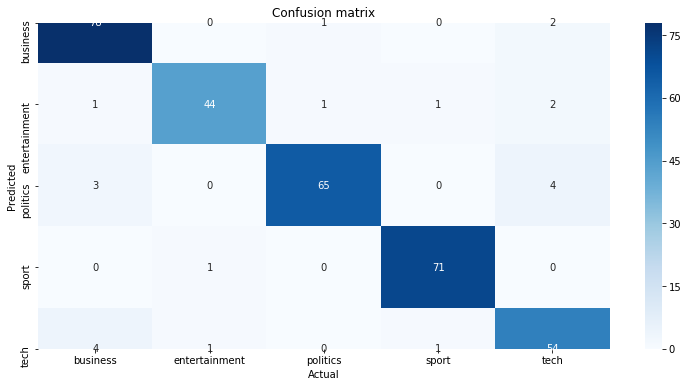

In [218]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, mulnb_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Bandingkan performansi dengan base model, yaitu model dengan parameter default.

In [219]:
base_model_mul = MultinomialNB()
base_model_mul.fit(features_train, labels_train)
accuracy_score(labels_test, base_model_mul.predict(features_test))

0.9341317365269461

In [288]:
classifier_mulnb.fit(features_train, labels_train)
accuracy_score(labels_train, classifier_mulnb.predict(features_train))

0.9539925965097832

## Comparison between classifiers

In [427]:
comp_default = pd.DataFrame({
    'CLASSIFIER' : ['Logistic Regression', 'Multinomial NB','KNN','SVM'],
    'Training Set Accuracy' : [accuracy_score(labels_train, best_classifier_log.predict(features_train)), accuracy_score(labels_train, classifier_mulnb.predict(features_train)), accuracy_score(labels_train, best_classifier_knn.predict(features_train)), accuracy_score(labels_train, best_classifier_svm.predict(features_train))],
    'Test Set Accuracy' : [accuracy_score(labels_test, classifier_pred_log), accuracy_score(labels_test, mulnb_pred), accuracy_score(labels_test, classifier_pred_knn), accuracy_score(labels_test, classifier_pred_svm)],
    'Random Search Accuracy' : [random_search_log.best_score_, 'None', 'None', random_search_svm.best_score_],
    'Grid Search Accuracy' : [grid_search_log.best_score_, 'None', knn_grid_search.best_score_, svm_grid_search.best_score_]
})

In [433]:
comp_default

,CLASSIFIER,Training Set Accuracy,Test Set Accuracy,Random Search Accuracy,Grid Search Accuracy
0,Logistic Regression,0.985722,0.940120,0.958752,0.9696
1,Multinomial NB,0.953993,0.934132,None,None
2,KNN,0.959810,0.940120,None,0.947733
3,SVM,0.959281,0.940120,0.921206,0.949867


In [457]:
comp_default.to_csv('Data/comparisons/class_comp_default_dataset.csv')

**Dengan menimbang data statistik di atas, disimpulkan bahwa:**
1. Untuk Training Set Accuracy, algoritma dengan presentase tertinggi adalah Algoritma **Logistic Regression**.
2. Untuk Test Set Accuracy, algoritma Logistic Regression, KNN, dan SVM memiliki presentase yang sama (identik).
3. Untuk Random Search Accuracy, algoritma dengan presentase tertinggi adalah Algoritma **Logistic Regression**.
4. Untuk Grid Search Accuracy, algoritma dengan presentase tertinggi adalah Algoritma **Logistic Regression**.

**Maka disimpulkan bahwa algorita terbaik adalah LOGISTIC REGRESSION**

## Default Dataset

In [438]:
train_score_log = accuracy_score(labels_train, best_classifier_log.predict(features_train))             

In [440]:
train_score_log

0.9857218402961396

In [445]:
train_score_knn = accuracy_score(labels_train, best_classifier_knn.predict(features_train))             

In [446]:
train_score_knn

0.9598096245372819

In [447]:
train_score_svm = accuracy_score(labels_train, best_classifier_svm.predict(features_train))             

In [448]:
train_score_svm

0.9592808038075092

## Membandingkan Algoritma Klasifikasi sesuai dengan soal no. 2

### 2a. Without Normalization

#### Logistic Regression

In [365]:
# Dataframe
path_df_nonormal = "Data/df_nonormal.pickle"
with open(path_df_nonormal, 'rb') as data:
    df_nonormal = pickle.load(data)

# features_train
path_features_train_nonormal = "Data/features_train_nonormal.pickle"
with open(path_features_train_nonormal, 'rb') as data:
    features_train_nonormal = pickle.load(data)

# labels_train
path_labels_train_nonormal = "Data/labels_train_nonormal.pickle"
with open(path_labels_train_nonormal, 'rb') as data:
    labels_train_nonormal = pickle.load(data)

# features_test
path_features_test_nonormal = "Data/features_test_nonormal.pickle"
with open(path_features_test_nonormal, 'rb') as data:
    features_test_nonormal = pickle.load(data)

# labels_test
path_labels_test_nonormal = "Data/labels_test_nonormal.pickle"
with open(path_labels_test_nonormal, 'rb') as data:
    labels_test_nonormal = pickle.load(data)

In [366]:
print(features_train_nonormal.shape)
print(features_test_nonormal.shape)

(1891, 300)
(334, 300)


In [367]:
best_classifier_log.fit(features_train_nonormal,labels_train_nonormal)

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [368]:
train_score_nonormal_log = accuracy_score(labels_train_nonormal, best_classifier_log.predict(features_train_nonormal))

In [369]:
classifier_pred_nonormal_log = best_classifier_log.predict(features_test_nonormal)

In [370]:
accuracy_score(labels_test_nonormal, classifier_pred_nonormal_log)

0.9341317365269461

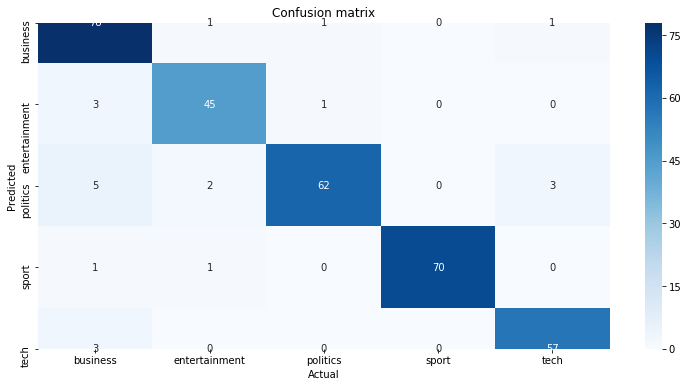

In [371]:
aux_df = df_nonormal[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_nonormal_log)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

#### KNN

In [374]:
best_classifier_knn.fit(features_train_nonormal,labels_train_nonormal)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [375]:
train_score_nonormal_knn = accuracy_score(labels_train_nonormal, best_classifier_knn.predict(features_train_nonormal))

In [376]:
classifier_pred_nonormal_knn = best_classifier_knn.predict(features_test_nonormal)

In [377]:
accuracy_score(labels_test_nonormal, classifier_pred_nonormal_knn)

0.9251497005988024

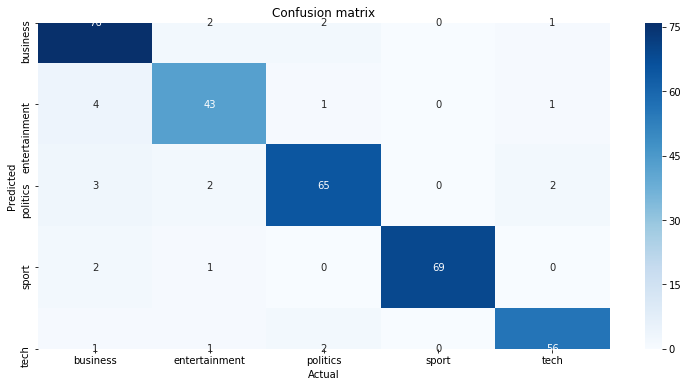

In [378]:
aux_df = df_nonormal[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_nonormal_knn)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

#### SVM

In [379]:
best_classifier_svm.fit(features_train_nonormal,labels_train_nonormal)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=8,
    shrinking=True, tol=0.001, verbose=False)

In [380]:
train_score_nonormal_svm = accuracy_score(labels_train_nonormal, best_classifier_svm.predict(features_train_nonormal))

In [381]:
classifier_pred_nonormal_svm = best_classifier_svm.predict(features_test_nonormal)

In [382]:
accuracy_score(labels_test_nonormal, classifier_pred_nonormal_svm)

0.9251497005988024

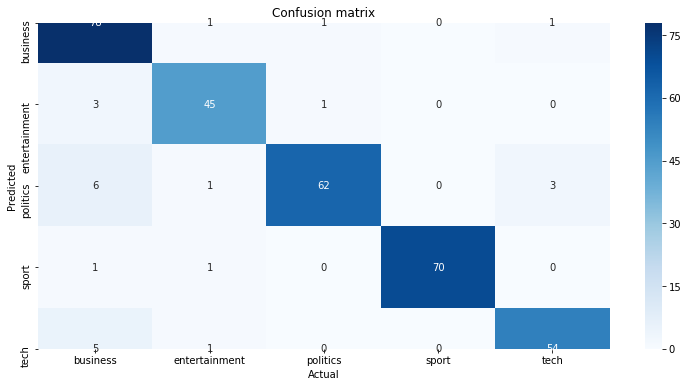

In [383]:
aux_df = df_nonormal[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_nonormal_svm)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

### 2b. Without Lemmatization

#### Logistic Regression

In [346]:
# Dataframe
path_df_nolemma = "Data/df_nolemma.pickle"
with open(path_df_nolemma, 'rb') as data:
    df_nolemma = pickle.load(data)

# features_train
path_features_train_nolemma = "Data/features_train_nolemma.pickle"
with open(path_features_train_nolemma, 'rb') as data:
    features_train_nolemma = pickle.load(data)

# labels_train
path_labels_train_nolemma = "Data/labels_train_nolemma.pickle"
with open(path_labels_train_nolemma, 'rb') as data:
    labels_train_nolemma = pickle.load(data)

# features_test
path_features_test_nolemma = "Data/features_test_nolemma.pickle"
with open(path_features_test_nolemma, 'rb') as data:
    features_test_nolemma = pickle.load(data)

# labels_test
path_labels_test_nolemma = "Data/labels_test_nolemma.pickle"
with open(path_labels_test_nolemma, 'rb') as data:
    labels_test_nolemma = pickle.load(data)

In [347]:
print(features_train_nolemma.shape)
print(features_test_nolemma.shape)

(1891, 300)
(334, 300)


In [348]:
best_classifier_log.fit(features_train_nolemma,labels_train_nolemma)

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [349]:
train_score_nolemma_log = accuracy_score(labels_train_nolemma, best_classifier_log.predict(features_train_nolemma))

In [350]:
classifier_pred_nolemma_log = best_classifier_log.predict(features_test_nolemma)

In [351]:
accuracy_score(labels_test_nolemma, classifier_pred_nolemma_log)

0.9461077844311377

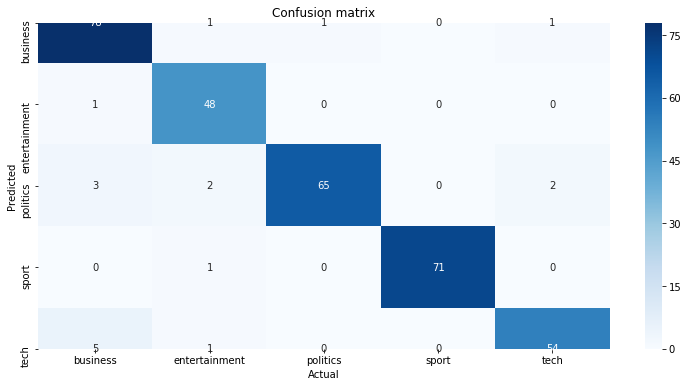

In [352]:
aux_df = df_nolemma[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_nolemma_log)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

#### KNN

In [353]:
best_classifier_knn.fit(features_train_nolemma,labels_train_nolemma)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [354]:
train_score_nolemma_knn = accuracy_score(labels_train_nolemma, best_classifier_knn.predict(features_train_nolemma))

In [355]:
classifier_pred_nolemma_knn = best_classifier_knn.predict(features_test_nolemma)

In [356]:
accuracy_score(labels_test_nolemma, classifier_pred_nolemma_knn)

0.9311377245508982

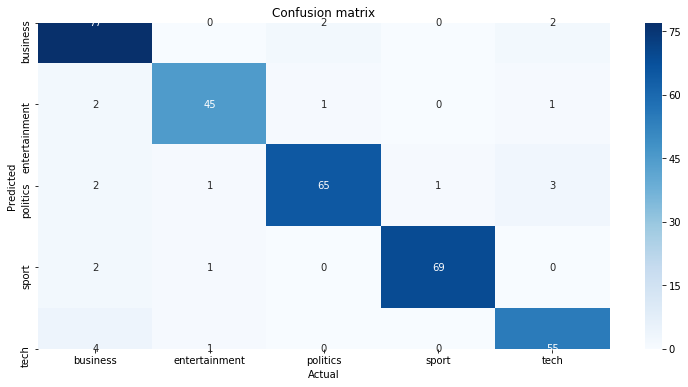

In [357]:
aux_df = df_nolemma[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_nolemma_knn)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

#### SVM

In [358]:
best_classifier_svm.fit(features_train_nolemma,labels_train_nolemma)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=8,
    shrinking=True, tol=0.001, verbose=False)

In [359]:
train_score_nolemma_svm = accuracy_score(labels_train_nolemma, best_classifier_svm.predict(features_train_nolemma))

In [360]:
classifier_pred_nolemma_svm = best_classifier_svm.predict(features_test_nolemma)

In [361]:
accuracy_score(labels_test_nolemma, classifier_pred_nolemma_svm)

0.9281437125748503

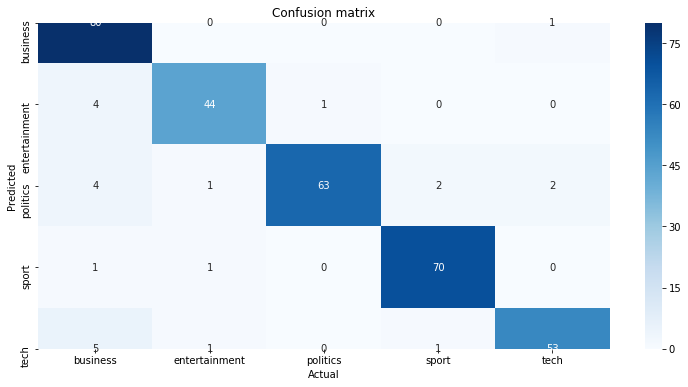

In [362]:
aux_df = df_nolemma[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_nolemma_svm)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

### 2c. Without stopwords removal

#### Logistic Regression

In [329]:
# Dataframe
path_df_nostopwords = "Data/df_nostopwords.pickle"
with open(path_df_nostopwords, 'rb') as data:
    df_nostopwords = pickle.load(data)

# features_train
path_features_train_nostopwords = "Data/features_train_nostopwords.pickle"
with open(path_features_train_nostopwords, 'rb') as data:
    features_train_nostopwords = pickle.load(data)

# labels_train
path_labels_train_nostopwords = "Data/labels_train_nostopwords.pickle"
with open(path_labels_train_nostopwords, 'rb') as data:
    labels_train_nostopwords = pickle.load(data)

# features_test
path_features_test_nostopwords = "Data/features_test_nostopwords.pickle"
with open(path_features_test_nostopwords, 'rb') as data:
    features_test_nostopwords = pickle.load(data)

# labels_test
path_labels_test_nostopwords = "Data/labels_test_nostopwords.pickle"
with open(path_labels_test_nostopwords, 'rb') as data:
    labels_test_nostopwords = pickle.load(data)

In [330]:
print(features_train_nostopwords.shape)
print(features_test_nostopwords.shape)

(1891, 300)
(334, 300)


In [331]:
best_classifier_log.fit(features_train_nostopwords,labels_train_nostopwords)

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [332]:
train_score_nostopwords_log = accuracy_score(labels_train_nostopwords, best_classifier_log.predict(features_train_nostopwords))

In [333]:
classifier_pred_nostopwords_log = best_classifier_log.predict(features_test_nostopwords)

In [334]:
accuracy_score(labels_test_nostopwords, classifier_pred_nostopwords_log)

0.9311377245508982

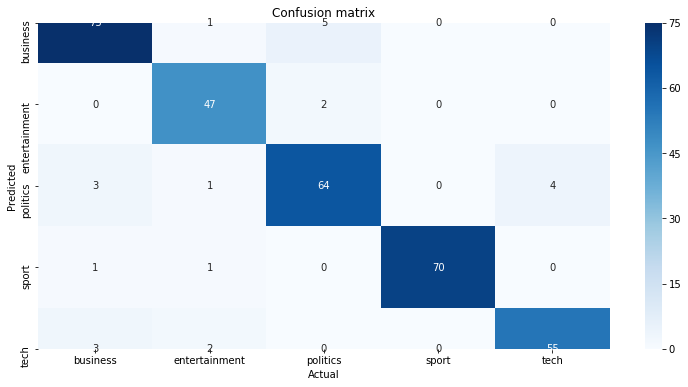

In [335]:
aux_df = df_nostopwords[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_nostopwords_log)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

#### KNN

In [336]:
best_classifier_log.fit(features_train_nostopwords,labels_train_nostopwords)

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [337]:
train_score_nostopwords_knn = accuracy_score(labels_train_nostopwords, best_classifier_knn.predict(features_train_nostopwords))

In [338]:
classifier_pred_nostopwords_knn = best_classifier_knn.predict(features_test_nostopwords)

In [339]:
accuracy_score(labels_test_nostopwords, classifier_pred_nostopwords_knn)

0.24251497005988024

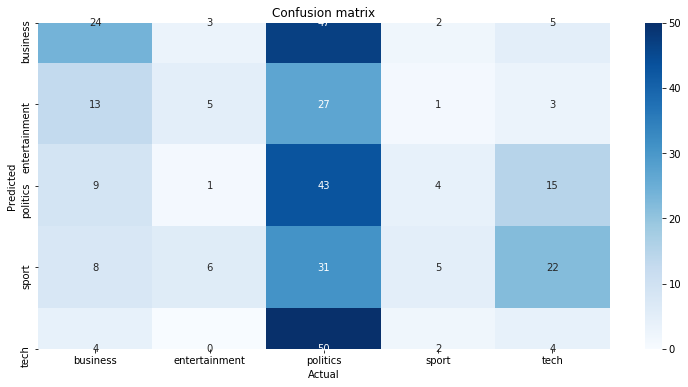

In [340]:
aux_df = df_nostopwords[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_nostopwords_knn)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

#### SVM

In [386]:
best_classifier_svm.fit(features_train_nostopwords,labels_train_nostopwords)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=8,
    shrinking=True, tol=0.001, verbose=False)

In [387]:
train_score_nostopwords_svm = accuracy_score(labels_train_nostopwords, best_classifier_svm.predict(features_train_nostopwords))

In [388]:
classifier_pred_nostopwords_svm = best_classifier_svm.predict(features_test_nostopwords)

In [389]:
accuracy_score(labels_test_nostopwords, classifier_pred_nostopwords_svm)

0.8802395209580839

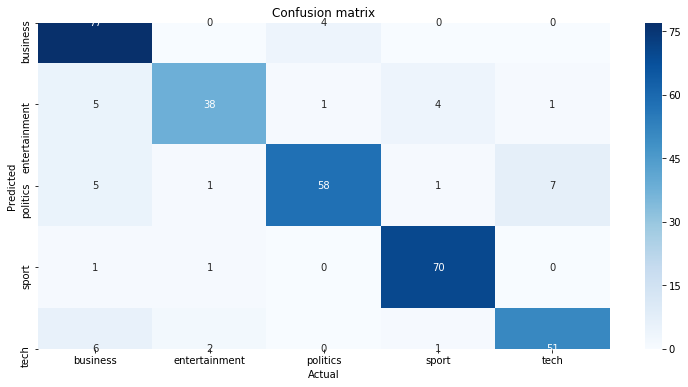

In [390]:
aux_df = df_nostopwords[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_nostopwords_svm)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

### Classifiers comparison between features

#### Logistic Regression

In [464]:
comp_different_features_log = pd.DataFrame({
    'Model' : ['Normal', 'without text normalization', 'without lemmatization', 'without stopword removal'],
    'Train Set Accuracy' : [train_score_log,train_score_nonormal_log,train_score_nolemma_log,train_score_nostopwords_log],
    'Test Set Accuracy' : [accuracy_score(labels_test,classifier_pred_log), accuracy_score(labels_test_nonormal, classifier_pred_nonormal_log),accuracy_score(labels_test_nolemma, classifier_pred_nolemma_log),accuracy_score(labels_test_nostopwords, classifier_pred_nostopwords_log)]
})
comp_different_features_log

,Model,Train Set Accuracy,Test Set Accuracy
0,Normal,0.985722,0.940120
1,without text normalization,0.985722,0.934132
2,without lemmatization,0.983607,0.946108
3,without stopword removal,0.974617,0.931138


In [465]:
comp_different_features_log.to_csv('Data/comparisons/comp_different_features_log.csv')

**Dengan menggunakan algoritma _Logistic Regression,_ dapat disimpulkan bahwa:**

1. Tanpa dilakukan proses normalisasi, maka akan memberikan pengaruh terhadap akurasi adalah **penurunan** akurasi sebesar **0.6%** dari **94,01%** menjadi **93,41%**, yaitu dengan menghilangkan karakter khusus, _lowercase_ setiap kata, dan penghapusan tanda baca dan 's (kepunyaan dalam Bahasa Inggris). Maka, penting untuk melakukan proses normalisasi terlebih dahulu.
2. Tanpa dilakukan proses lemmatisasi, akurasi yang didapatkan adalah **94.61%**, mengalami **peningkatan 0.6%**. Maka, dengan mengabaikan proses lematisasi, menjadi **lebih akurat** dibandingkan dengan menggunakan lemmatisasi.
3. Tanpa menghilangkan _stopwords_ akurasi menjadi **93.11%**, mengalami **penurunan 0.9%**. Maka, penghilangan _stopwords_ memiliki peran yang cukup penting dalam klasifikasi teks. Maka, secara persentase, proses _stopwords_ **0.3% lebih penting** dari proses normalisasi.

#### KNN

In [467]:
comp_different_features_knn = pd.DataFrame({
    'Model' : ['Normal', 'without text normalization', 'without lemmatization', 'without stopword removal'],
    'Train Set Accuracy' : [train_score_knn,train_score_nonormal_knn,train_score_nolemma_knn,train_score_nostopwords_knn],
    'Test Set Accuracy' : [accuracy_score(labels_test,classifier_pred_knn), accuracy_score(labels_test_nonormal, classifier_pred_nonormal_knn),accuracy_score(labels_test_nolemma, classifier_pred_nolemma_knn),accuracy_score(labels_test_nostopwords, classifier_pred_nostopwords_knn)]
})
comp_different_features_knn 

,Model,Train Set Accuracy,Test Set Accuracy
0,Normal,0.959810,0.940120
1,without text normalization,0.957694,0.925150
2,without lemmatization,0.961396,0.931138
3,without stopword removal,0.951348,0.928144


In [468]:
comp_different_features_knn.to_csv('Data/comparisons/comp_different_features_knn.csv')

**Dengan menggunakan algoritma KNN, dapat disimpulkan bahwa:**

1. Tanpa dilakukan proses normalisasi, maka akan memberikan pengaruh terhadap akurasi adalah **penurunan** akurasi sebesar **1.5%** dari **94,01%** menjadi **92,51%**, yaitu dengan menghilangkan karakter khusus, _lowercase_ setiap kata, dan penghapusan tanda baca dan 's (kepunyaan dalam Bahasa Inggris). Maka, dengan algoritma KNN, penggunaan normalisasi lebih dibutuhkan dibandingkan dengan algoritma _Linear Regression_.
2. Tanpa dilakukan proses lemmatisasi, akurasi yang didapatkan adalah **93.11%**, mengalami **penurunan 0.9%**. Maka, proses lemmatisasi pun diperlukan pada algoritma KNN.
3. Tanpa menghilangkan _stopwords_ akurasi menjadi **92.81%**, mengalami **penurunan 1.2%**. Dengan ini, pada algoritma KNN, menghilangkan _stopwords_ menjadi urutan ke-2 yang memengaruhi akurasi.

#### SVM

In [469]:
comp_different_features_svm = pd.DataFrame({
    'Model' : ['Normal', 'without text normalization', 'without lemmatization', 'without stopword removal'],
    'Train Set Accuracy' : [train_score_svm,train_score_nonormal_svm,train_score_nolemma_svm,train_score_nostopwords_svm],
    'Test Set Accuracy' : [accuracy_score(labels_test,classifier_pred_svm), accuracy_score(labels_test_nonormal, classifier_pred_nonormal_svm),accuracy_score(labels_test_nolemma, classifier_pred_nolemma_svm),accuracy_score(labels_test_nostopwords, classifier_pred_nostopwords_svm)]
})
comp_different_features_svm

,Model,Train Set Accuracy,Test Set Accuracy
0,Normal,0.959281,0.940120
1,without text normalization,0.960338,0.925150
2,without lemmatization,0.962454,0.928144
3,without stopword removal,0.948176,0.880240


In [470]:
comp_different_features_svm.to_csv('Data/comparisons/comp_different_features_svm.csv')

**Dengan menggunakan algoritma SVM, dapat disimpulkan bahwa:**

1. Tanpa dilakukan proses normalisasi, maka akan memberikan pengaruh terhadap akurasi adalah **penurunan** akurasi sebesar **1.5%** dari **94,01%** menjadi **92,51%**, yaitu dengan menghilangkan karakter khusus, _lowercase_ setiap kata, dan penghapusan tanda baca dan 's (kepunyaan dalam Bahasa Inggris). Penurunan akurasi pada algoritma SVM dan KNN, memiliki presentase yang sama. Maka proses normalisasi akan sama pentingnya dengan keduanya.
2. Tanpa dilakukan proses lemmatisasi, akurasi yang didapatkan adalah **92.81%**, mengalami **penurunan 1.2%**. Maka, proses lemmatisasi pun diperlukan pada algoritma SVM.
3. Tanpa menghilangkan _stopwords_ akurasi menjadi **88.02%**. Dengan ini, pada algoritma SVM, menghilangkan _stopwords_ adalah hal yang berakibat "fatal", karena mengakibatkan penurunan yang sangat signifikan, yaitu **5.99%**

## Membandingkan Algoritma Klasifikasi sesuai dengan soal no. 3

### 3a. Max features < 300

In [472]:
# Dataframe
path_df_300min = "Data/df_300min.pickle"
with open(path_df_300min, 'rb') as data:
    df_300min = pickle.load(data)

# features_train
path_features_train_300min = "Data/features_train_300min.pickle"
with open(path_features_train_300min, 'rb') as data:
    features_train_300min = pickle.load(data)

# labels_train
path_labels_train_300min = "Data/labels_train_300min.pickle"
with open(path_labels_train_300min, 'rb') as data:
    labels_train_300min = pickle.load(data)

# features_test
path_features_test_300min = "Data/features_test_300min.pickle"
with open(path_features_test_300min, 'rb') as data:
    features_test_300min = pickle.load(data)

# labels_test
path_labels_test_300min = "Data/labels_test_300min.pickle"
with open(path_labels_test_300min, 'rb') as data:
    labels_test_300min = pickle.load(data)

In [473]:
print(features_train_300min.shape)
print(features_test_300min.shape)

(1891, 200)
(334, 200)


#### Logistic Regression

In [517]:
best_classifier_log.fit(features_train_300min,labels_train_300min)

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [518]:
train_score_300min_log = accuracy_score(labels_train_300min, best_classifier_log.predict(features_train_300min))

In [519]:
classifier_pred_300min_log = best_classifier_log.predict(features_test_300min)

In [520]:
accuracy_score(labels_test_300min, classifier_pred_300min_log)

0.9191616766467066

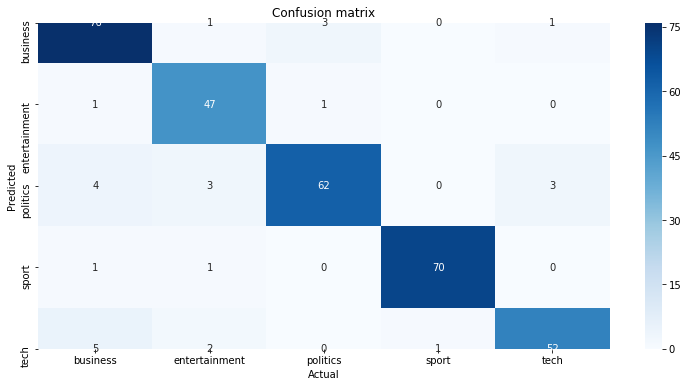

In [521]:
aux_df = df_nostopwords[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_300min_log)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

#### KNN

In [546]:
best_classifier_knn.fit(features_train_300min,labels_train_300min)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [547]:
train_score_300min_knn = accuracy_score(labels_train_300min, best_classifier_knn.predict(features_train_300min))

In [548]:
classifier_pred_300min_knn = best_classifier_knn.predict(features_test_300min)

In [549]:
accuracy_score(labels_test_300min, classifier_pred_300min_knn)

0.9161676646706587

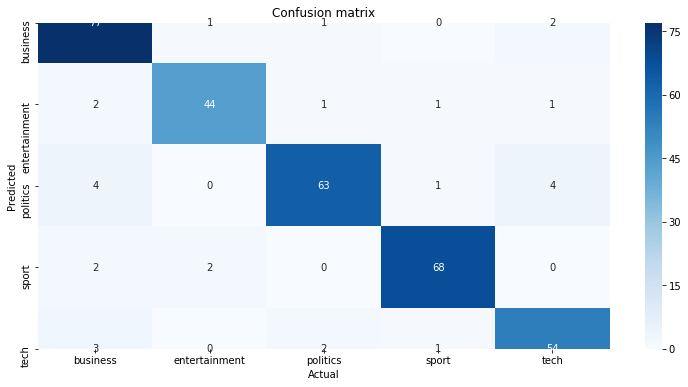

In [550]:
aux_df = df_nostopwords[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_300min_knn)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

#### SVM

In [494]:
best_classifier_svm.fit(features_train_300min,labels_train_300min)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=8,
    shrinking=True, tol=0.001, verbose=False)

In [495]:
train_score_300min_svm = accuracy_score(labels_train_300min, best_classifier_svm.predict(features_train_300min))

In [496]:
classifier_pred_300min_svm = best_classifier_svm.predict(features_test_300min)

In [497]:
accuracy_score(labels_test_300min, classifier_pred_300min_svm)

0.9131736526946108

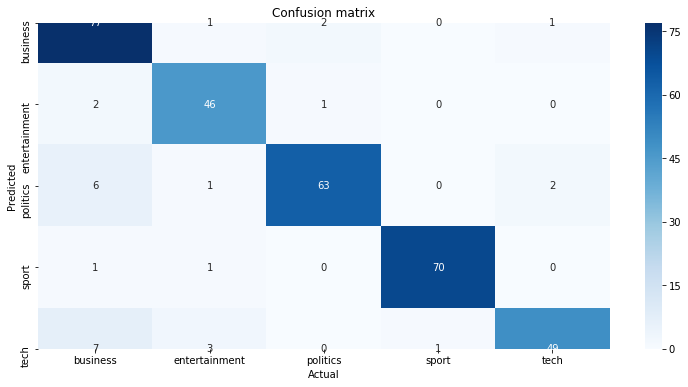

In [498]:
aux_df = df_nostopwords[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_300min_svm)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

### 3b. Max features > 300

In [499]:
# Dataframe
path_df_300plus = "Data/df_300plus.pickle"
with open(path_df_300plus, 'rb') as data:
    df_300plus = pickle.load(data)

# features_train
path_features_train_300plus = "Data/features_train_300plus.pickle"
with open(path_features_train_300plus, 'rb') as data:
    features_train_300plus = pickle.load(data)

# labels_train
path_labels_train_300plus = "Data/labels_train_300plus.pickle"
with open(path_labels_train_300plus, 'rb') as data:
    labels_train_300plus = pickle.load(data)

# features_test
path_features_test_300plus = "Data/features_test_300plus.pickle"
with open(path_features_test_300plus, 'rb') as data:
    features_test_300plus = pickle.load(data)

# labels_test
path_labels_test_300plus = "Data/labels_test_300plus.pickle"
with open(path_labels_test_300plus, 'rb') as data:
    labels_test_300plus = pickle.load(data)

In [500]:
print(features_train_300plus.shape)
print(features_test_300plus.shape)

(1891, 400)
(334, 400)


#### Logistic Regression

In [501]:
best_classifier_log.fit(features_train_300plus,labels_train_300plus)

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [502]:
train_score_300plus_log = accuracy_score(labels_train_300plus, best_classifier_log.predict(features_train_300plus))

In [503]:
classifier_pred_300plus_log = best_classifier_log.predict(features_test_300plus)

In [504]:
accuracy_score(labels_test_300plus, classifier_pred_300plus_log)

0.9520958083832335

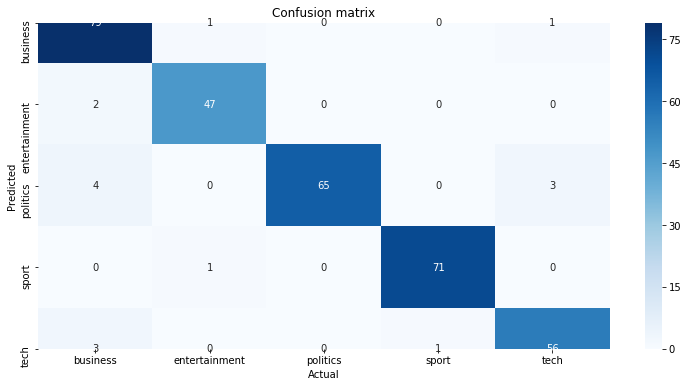

In [505]:
aux_df = df_nostopwords[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_300plus_log)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

#### KNN

In [536]:
best_classifier_knn.fit(features_train_300plus,labels_train_300plus)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [537]:
train_score_300plus_knn = accuracy_score(labels_train_300plus, best_classifier_knn.predict(features_train_300plus))

In [538]:
classifier_pred_300plus_knn = best_classifier_knn.predict(features_test_300plus)

In [539]:
accuracy_score(labels_test_300plus, classifier_pred_300plus_knn)

0.9221556886227545

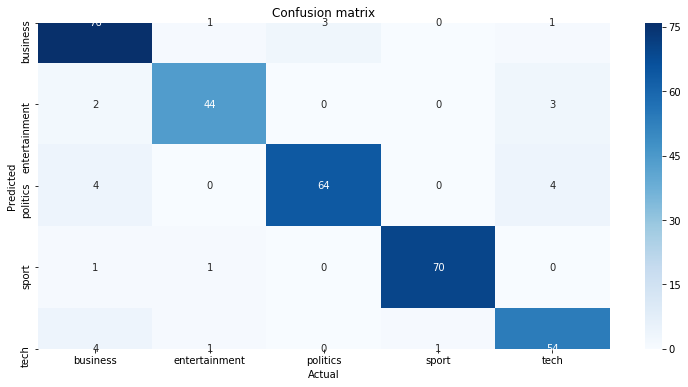

In [540]:
aux_df = df_nostopwords[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_300plus_knn)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

#### SVM

In [541]:
best_classifier_svm.fit(features_train_300plus,labels_train_300plus)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=8,
    shrinking=True, tol=0.001, verbose=False)

In [542]:
train_score_300plus_svm = accuracy_score(labels_train_300plus, best_classifier_svm.predict(features_train_300plus))

In [543]:
classifier_pred_300plus_svm = best_classifier_svm.predict(features_test_300plus)

In [544]:
accuracy_score(labels_test_300plus, classifier_pred_300plus_svm)

0.937125748502994

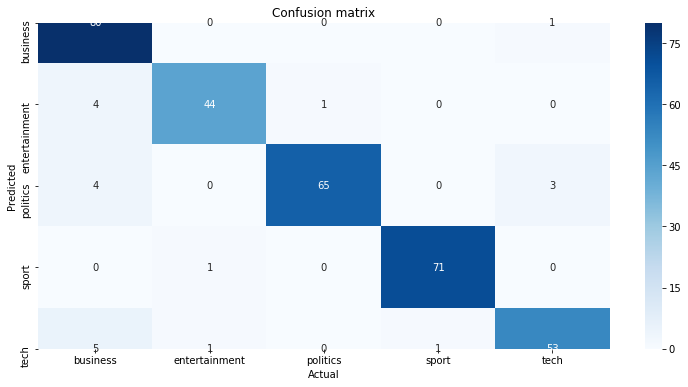

In [545]:
aux_df = df_nostopwords[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_300plus_svm)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

### Comparison

#### Logistic Regression

In [530]:
comp_different_max_log = pd.DataFrame({
    'Model' : ['200 features', '300 features', '400 features'],
    'Train Set Accuracy' : [train_score_300min_log,train_score_log,train_score_300plus_log],
    'Test Set Accuracy' : [accuracy_score(labels_test_300min, classifier_pred_300min_log),accuracy_score(labels_test,classifier_pred_log),accuracy_score(labels_test_300plus, classifier_pred_300plus_log)]
})
comp_different_max_log

,Model,Train Set Accuracy,Test Set Accuracy
0,200 features,0.972501,0.919162
1,300 features,0.985722,0.940120
2,400 features,0.987308,0.952096


In [531]:
comp_different_max_log.to_csv('Data/comparisons/comp_different_max_log.csv')

Pada algoritma **_Logistic Regression_** semakin tinggi **_max feature_** akan semakin tinggi pula kedua akurasi yang didapatkan.

#### KNN

In [551]:
comp_different_max_knn = pd.DataFrame({
    'Model' : ['200 features', '300 features', '400 features'],
    'Train Set Accuracy' : [train_score_300min_knn,train_score_knn,train_score_300plus_knn],
    'Test Set Accuracy' : [accuracy_score(labels_test_300min, classifier_pred_300min_knn),accuracy_score(labels_test,classifier_pred_knn),accuracy_score(labels_test_300plus, classifier_pred_300plus_knn)]
})
comp_different_max_knn

,Model,Train Set Accuracy,Test Set Accuracy
0,200 features,0.957694,0.916168
1,300 features,0.959810,0.940120
2,400 features,0.962454,0.922156


In [533]:
comp_different_max_knn.to_csv('Data/comparisons/comp_different_max_knn.csv')

Pada algoritma **_KNN_** semakin tinggi **_max feature_** akan semakin tinggi pula akurasi **_train_** yang didapatkan. Lain dengan akurasi **_test_**, yang mengalami penurunan akurasi sebesar **1.8%** ketika _max feature_ sama dengan 400, dan penurunan sebesar **2.4%** ketika _max feature_ sama dengan 200.

#### SVM

In [552]:
comp_different_max_svm = pd.DataFrame({
    'Model' : ['200 features', '300 features', '400 features'],
    'Train Set Accuracy' : [train_score_300min_svm,train_score_svm,train_score_300plus_svm],
    'Test Set Accuracy' : [accuracy_score(labels_test_300min, classifier_pred_300min_svm),accuracy_score(labels_test,classifier_pred_svm),accuracy_score(labels_test_300plus, classifier_pred_300plus_svm)]
})
comp_different_max_svm

,Model,Train Set Accuracy,Test Set Accuracy
0,200 features,0.953993,0.913174
1,300 features,0.959281,0.940120
2,400 features,0.967213,0.937126


In [553]:
comp_different_max_svm.to_csv('Data/comparisons/comp_different_max_svm.csv')

Pada algoritma **_SVM_** pun sama, semakin tinggi **_max feature_** akan semakin tinggi pula akurasi **_train_** yang didapatkan. Lain dengan akurasi **_test_**, yang mengalami penurunan akurasi, namun tingkat penurunannya lebih rendah dibandingkan dengan algoritma **_KNN_**, yaitu sebesar **0.3%** ketika _max feature_ sama dengan 400.

## Jawaban No. 5

<div><p>Bagian <b><i>pre-processing</i></b> adalah yang <b>perlu disesuaikan</b>, di antaranya: <br>(1) <b>Lematisasi</b> yang menggunakan kata dasar dalam Bahasa Indonesia. <br>(2) <b><i>Stopword</i></b> juga yang selanjutnya disesuaikan dengan Bahasa Indonesia. <br>(3) <b>Normalisasi,</b> yaitu menghilangkan ('s) karena penggunaan ('s) untuk kepunyaan tidak ada dalam kaidah Bahasa Indonesia.</p></div>